[-14.  12. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.  14.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


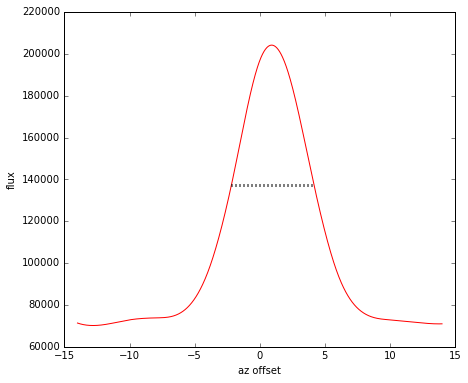

In [180]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

data = numpy.genfromtxt('sun1.rad',comments='*')
'''
data.T[0]

data.T[1] ev.

data.T[3] offset azimut

data.T[4] offset elevacion

data.T[5] freq.

data.T[6] ancho

data.T[7] modo de observacion

data.T[8] numero bins (156)
'''



#primer espectro
s0 = data[0][9+9:9+156-9]
df = data.T[6]
nbins = data.T[8]
bandwidth = df*nbins

bandwidth = df*(nbins - 9 -9) # without wigs

#plt.figure()
freqs = data.T[5][0] + numpy.linspace(0,nbins[0]*df[0],nbins[0])
freqs = freqs[9:156-9]
#plt.plot(freqs,s0)

print data.T[3]
print data.T[4]

s = []
az = numpy.delete(data.T[3],1) #error en el script
#data.T[3][1] = -12
for i in range(0,len(data)):
    s.append(data[i][9+9:9+156-9])
#plt.figure()
power = numpy.sum(s, axis = 0)
#plt.plot(freqs, power)

power = numpy.sum(s, axis = 1)
power = numpy.delete(power,1)
plt.figure(figsize=(7,6))

#plt.plot(az, power,'k.',ms=9 )
                 
plt.xlabel('az offset')
plt.ylabel('flux')

from scipy.interpolate import interp1d
x = az
y = power
f = interp1d(x, y, kind='cubic')
xnew = numpy.linspace(numpy.min(x), numpy.max(x), 1000, endpoint=True)
plt.plot(xnew, f(xnew),'r',lw=1)

peak_az = xnew[numpy.where(numpy.max(f(xnew))==f(xnew))]
mid_flux = (numpy.max(f(xnew)) + numpy.min(f(xnew))) / 2

aux = numpy.abs(mid_flux - f(xnew) )

xmin1 = numpy.argmin(aux)
xmin2 = numpy.argmin(numpy.delete(aux,xmin1))
dif_az = numpy.abs(xnew[xmin1] - xnew[xmin2])

plt.plot([xnew[xmin1],xnew[xmin2]],[mid_flux,mid_flux],'k:',lw=3)
#plt.axhline(y=mid_flux,linestyle=':',linewidth=2,color='k')
#plt.savefig('az_bean.png')

[-14.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
[  0. -12. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.  14.]


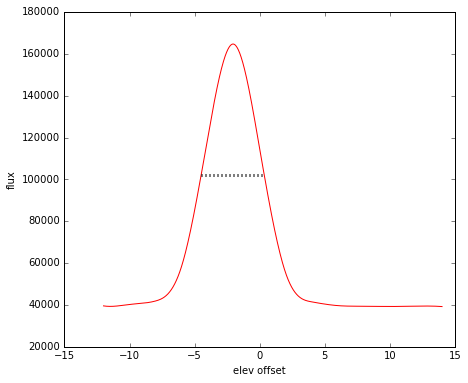

In [181]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

data = numpy.genfromtxt('sun2.rad',comments='*')
'''
data.T[0]

data.T[1] ev.

data.T[3] offset azimut

data.T[4] offset elevacion

data.T[5] freq.

data.T[6] ancho

data.T[7] modo de observacion

data.T[8] numero bins (156)
'''



#primer espectro
data[0][9:9+156]

s0 = data[0][9+9:9+156-9]
df = data.T[6]
nbins = data.T[8]
bandwidth = df*nbins

bandwidth = df*(nbins - 9 -9) # without wigs

#plt.figure()
freqs = data.T[5][0] + numpy.linspace(0,nbins[0]*df[0],nbins[0])
freqs = freqs[9:156-9]
#plt.plot(freqs,s0)


s = []
print data.T[3]
print data.T[4] # -14

elev = numpy.delete(data.T[4],0) #error en el script
for i in range(0,len(data)):
    s.append(data[i][9+9:9+156-9])

#plt.figure()
power = numpy.sum(s, axis = 0)
#plt.plot(freqs, power)

power = numpy.sum(s, axis = 1)
power = numpy.delete(power,0)
plt.figure(figsize=(7,6))

#plt.plot(elev, power,'k.',ms=9 )
                 
plt.xlabel('elev offset')
plt.ylabel('flux')

from scipy.interpolate import interp1d
x = elev
y = power
f = interp1d(x, y, kind='cubic')
xnew = numpy.linspace(numpy.min(x), numpy.max(x), 1000, endpoint=True)
plt.plot(xnew, f(xnew),'r-',lw=1 )

peak_elev = xnew[numpy.where(numpy.max(f(xnew))==f(xnew))]

mid_flux = (numpy.max(f(xnew)) + numpy.min(f(xnew))) / 2

aux = numpy.abs(mid_flux - f(xnew) )

xmin1 = numpy.argmin(aux)
xmin2 = numpy.argmin(numpy.delete(aux,xmin1))
dif_elev = numpy.abs(xnew[xmin1] - xnew[xmin2])

plt.plot([xnew[xmin1],xnew[xmin2]],[mid_flux,mid_flux],'k:',lw=3)

#plt.savefig('elev_beam.png')

In [183]:
print "offset az =", peak_az[0],"\toffset elev =",peak_elev[0]
print "beam az =", dif_az,"\tbeam elev =",dif_elev

offset az = 0.910910910911 	offset elev = -2.05805805806
beam az = 6.30630630631 	beam elev = 4.81481481481
